# Imports

In [ ]:
%load_ext autoreload
%autoreload 2

In [17]:
# Astonishingly there seems to be no clean way to set up the Python path automatically for a script that does not
# reside in the root folder. This will need to be added to all notebooks unless a better solution comes along.
import os, sys
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F

from datasets.mini_imagenet import MiniImageNet, Split
from datasets.utils import extract_archive

# Dataset Sandbox

In [33]:
ds = MiniImageNet("../../data/mini-imagenet", Split.TRAIN, download=True)

Computing MD5: /Users/ntraft/Development/data/mini-imagenet/train.tar
MD5 matches: /Users/ntraft/Development/data/mini-imagenet/train.tar
/Users/ntraft/Development/data/mini-imagenet/processed_images/train already exists.


Training Set statistics:
64 classes
38400 examples


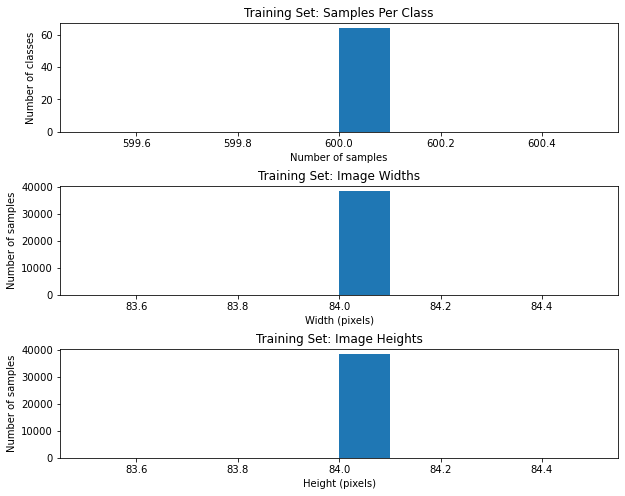

In [34]:
from collections import defaultdict, namedtuple


def show_image_classification_dataset_stats(name, dataset):
    """
    Show statistics for an image classification dataset.
    
    Args:
        name (str): Name of the dataset, like "Training" or "Validation".
        dataset (Dataset): A PyTorch dataset object.
    """
    title = name + " Set"
    print(f"Collecting {title} statistics...", end=" ", flush=True)
    total_size = 0
    class_sizes = []
    widths = []
    heights = []
    class_map = defaultdict(int)
    for img, label in dataset:
        class_map[label] += 1
        widths.append(img.width)
        heights.append(img.height)
    class_sizes = list(class_map.values())
    print("done.")

    print(title, "statistics:")
    print(len(class_map), "classes")
    print(len(dataset), "examples")

    fig, (sax, wax, hax) = plt.subplots(3, figsize=(10, 8), gridspec_kw={"hspace": 0.5})
    sax.hist(class_sizes)
    sax.set_xlabel("Number of samples")
    sax.set_ylabel("Number of classes")
    sax.set_title(f"{title}: Samples Per Class")

    wax.hist(widths)
    wax.set_xlabel("Width (pixels)")
    wax.set_ylabel("Number of samples")
    wax.set_title(f"{title}: Image Widths")

    hax.hist(heights)
    hax.set_xlabel("Height (pixels)")
    hax.set_ylabel("Number of samples")
    hax.set_title(f"{title}: Image Heights")

    
show_image_classification_dataset_stats(str(ds.split), ds)

In [15]:
cdex = ds.class_index
print(len(cdex))
print(f"First class: {cdex[0][0]} to {cdex[0][-1]}")
print(f"Second class: {cdex[1][0]} to {cdex[1][-1]}")
print(f"Last class: {cdex[-1][0]} to {cdex[-1][-1]}")

16
First class: 0 to 599
Second class: 600 to 1199
Last class: 9000 to 9599


# Torch Sandbox

In [30]:
from model import ConvBlock

in_channels = 1
out_channels = 256
conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3)
conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3)

batch = torch.randn(20, in_channels, 28, 28)
out = conv2(conv1(batch))
print(out.size())

print(F.max_pool2d(batch, kernel_size=2, stride=2).size())
print(F.max_pool2d(out, kernel_size=2, stride=2).size())
print(torch.flatten(out, start_dim=1).size())
print(np.prod(out.size()[1:]))
print()

torch.Size([20, 256, 24, 24])
torch.Size([20, 1, 14, 14])
torch.Size([20, 256, 12, 12])
torch.Size([20, 147456])
147456
49152.0


# Python Sandbox

In [36]:
a = ["a", "b", "c"]
b = [1, 2, 3]
c = ["x", "y", "z"]
z = list(zip(a, b, c))
print(z)
u = list(zip(*z))
print(u)

[('a', 1, 'x'), ('b', 2, 'y'), ('c', 3, 'z')]
[('a', 'b', 'c'), (1, 2, 3), ('x', 'y', 'z')]
